In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:

import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 或者 ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 如有必要，清除字体缓存（执行一次即可）
cache_dir = matplotlib.get_cachedir()
font_cache = os.path.join(cache_dir, 'fontList.json')
if os.path.exists(font_cache):
    os.remove(font_cache)
    print("已删除字体缓存，请重启解释器后再运行代码。")

In [38]:
df1 = pd.read_csv("/Users/zhaixinyue/Desktop/archive/train.csv")
meal = pd.read_csv("/Users/zhaixinyue/Desktop/archive/meal_info.csv")
flmc=pd.read_csv("/Users/zhaixinyue/Desktop/archive/fulfilment_center_info.csv")

In [39]:
df1.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [40]:
""" 主表（左表）：df
副表（右表）：meal
连接方式：how="left"（左连接，保留 df 的所有行）
连接键：on="meal_id"
"""

df1 = df1.merge(meal,
              how = "left",
              on = "meal_id")
df1= df1.merge(flmc,
              how = "left",
              on = "center_id")


In [41]:
year = 2022
start_date = pd.to_datetime(f'{year}-01-01')

df1['date'] = start_date + pd.to_timedelta(df1['week'] - 1, unit='W')

df1['month'] = df1['date'].dt.month
df1['quarter'] = df1['date'].dt.quarter

In [42]:
import pandas as pd
from datetime import timedelta, datetime

# 起始日期
start_date = datetime(2022, 1, 1)


# 创建一个日期映射函数
def map_week_to_date(df, start_date):
    # 创建一个空的日期列
    df['date'] = pd.NaT

    # 循环遍历每个周数
    for i in range(1, 147):  # 假设周数从1到146
        # 找到该周的所有索引
        indices = df[df['week'] == i].index
        
        # 对于每个索引，分配日期，保证一周内日期不超过7天循环
        for j, idx in enumerate(indices):
            # 计算日期，当前索引对7取余，确定是周中的哪一天
            day_offset = (j % 7)
            # 日期递增
            specific_date = start_date + timedelta(days=(i - 1) * 7 + day_offset)
            # 更新DataFrame
            df.at[idx, 'date'] = specific_date

# 应用函数
map_week_to_date(df1, start_date)

# 显示结果，检查 'date' 列
print(df1[['week', 'date']].head(15))

    week       date
0      1 2022-01-01
1      1 2022-01-02
2      1 2022-01-03
3      1 2022-01-04
4      1 2022-01-05
5      1 2022-01-06
6      1 2022-01-07
7      1 2022-01-01
8      1 2022-01-02
9      1 2022-01-03
10     1 2022-01-04
11     1 2022-01-05
12     1 2022-01-06
13     1 2022-01-07
14     1 2022-01-01


In [43]:
df1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,date,month,quarter
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,2022-01-01,1,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0,2022-01-02,1,1
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0,2022-01-03,1,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0,2022-01-04,1,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0,2022-01-05,1,1


In [44]:
df1.count()

id                       456548
week                     456548
center_id                456548
meal_id                  456548
checkout_price           456548
base_price               456548
emailer_for_promotion    456548
homepage_featured        456548
num_orders               456548
category                 456548
cuisine                  456548
city_code                456548
region_code              456548
center_type              456548
op_area                  456548
date                     456548
month                    456548
quarter                  456548
dtype: int64

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

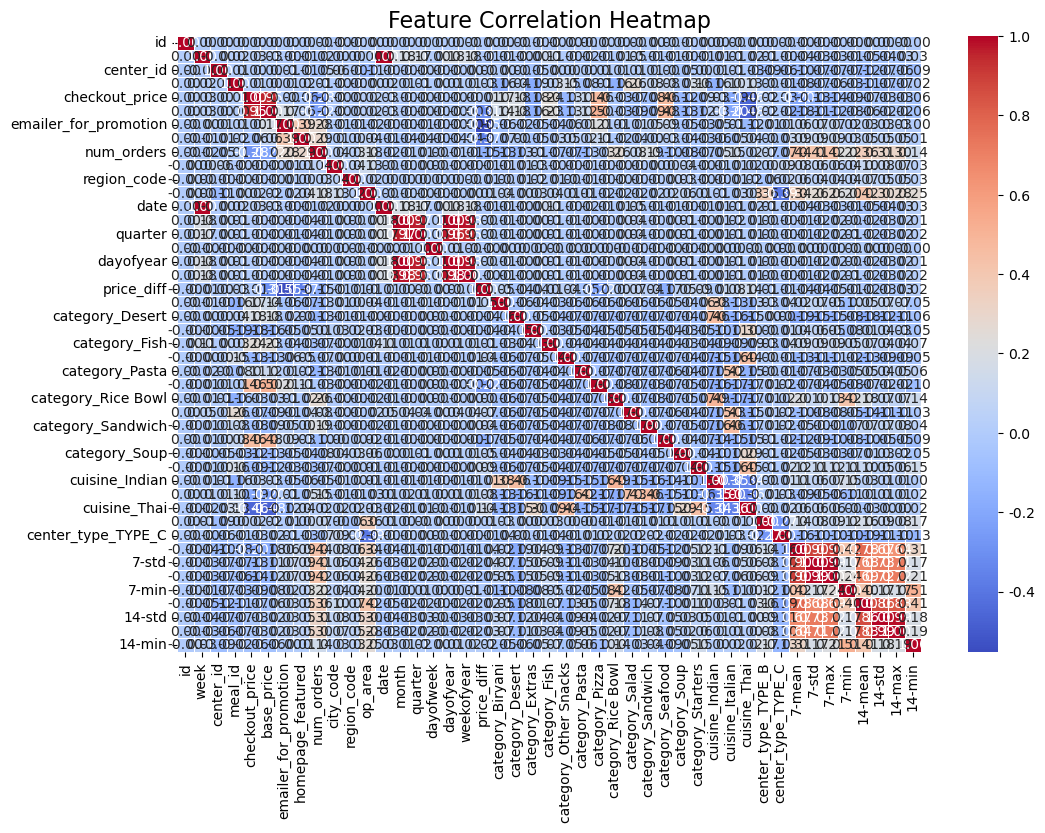

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 df1 是你的数据集
# 先确保日期列为 datetime 类型
df1['date'] = pd.to_datetime(df1['date'])

# 1. 时间相关特征
df1['dayofweek'] = df1['date'].dt.dayofweek  # 一周中的某天
df1['month'] = df1['date'].dt.month  # 月份
df1['quarter'] = df1['date'].dt.quarter  # 季度
df1['dayofyear'] = df1['date'].dt.dayofyear  # 一年中的某天
df1['weekofyear'] = df1['date'].dt.isocalendar().week  # 一年中的某周

# 2. 价格特征
df1['price_diff'] = df1['checkout_price'] - df1['base_price']  # 价格差异

# 3. 类别特征（使用独热编码）
df1 = pd.get_dummies(df1, columns=['category', 'cuisine', 'center_type'], drop_first=True)

# 4. 滑动窗口特征
# 过去 7 天销量的均值、标准差、最大值、最小值
df1['7-mean'] = df1['num_orders'].rolling(window=7).mean()
df1['7-std'] = df1['num_orders'].rolling(window=7).std()
df1['7-max'] = df1['num_orders'].rolling(window=7).max()
df1['7-min'] = df1['num_orders'].rolling(window=7).min()

# 过去 14 天销量的均值、标准差、最大值、最小值
df1['14-mean'] = df1['num_orders'].rolling(window=14).mean()
df1['14-std'] = df1['num_orders'].rolling(window=14).std()
df1['14-max'] = df1['num_orders'].rolling(window=14).max()
df1['14-min'] = df1['num_orders'].rolling(window=14).min()

# 5. 删除包含NaN值的行（由于滑动窗口特征产生的NaN值）
df1 = df1.dropna()

# 6. 计算特征之间的相关性矩阵
corr_matrix = df1.corr()

# 7. 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', cbar=True)

# 设置标题
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

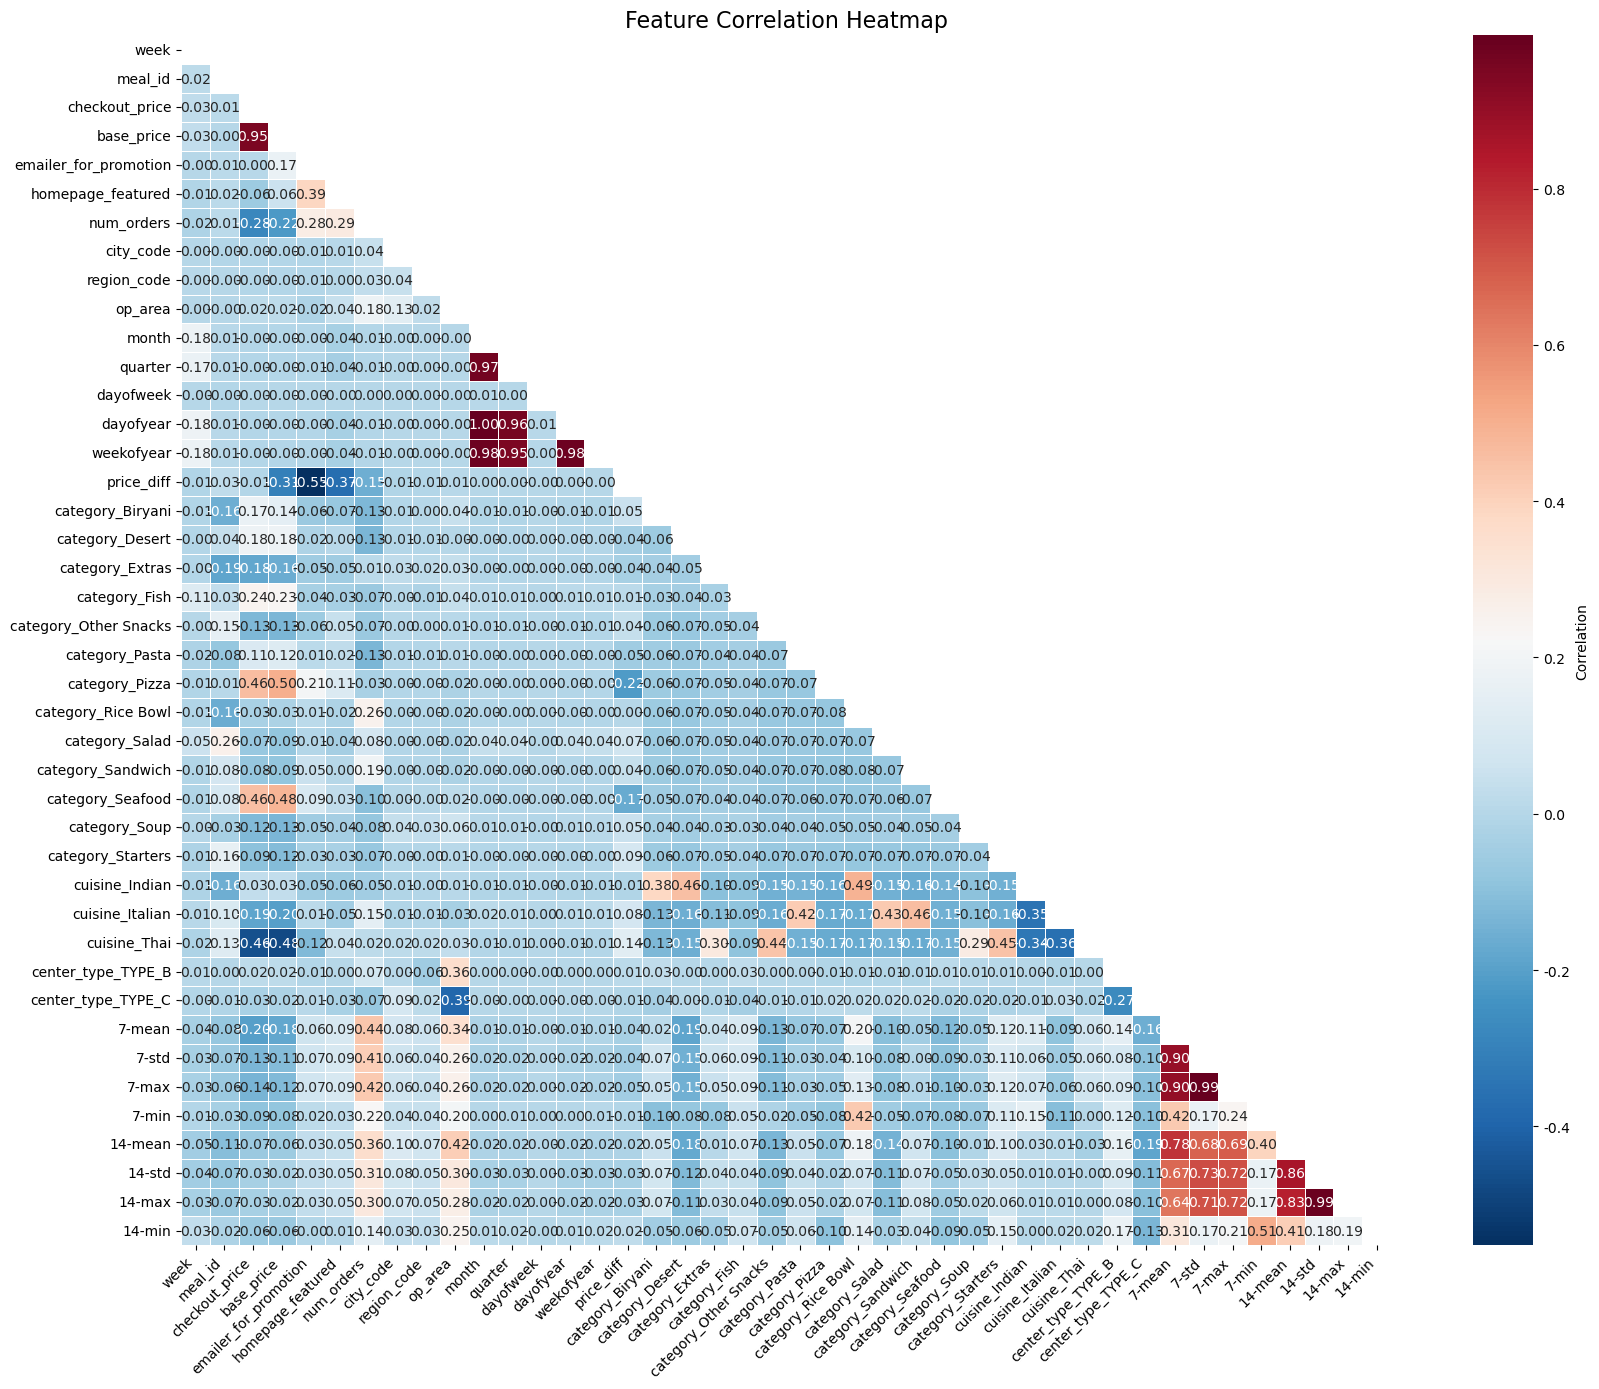

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 计算相关性矩阵，去掉不需要的列
df_corr = df1.drop(columns=['id', 'center_id', 'date']).corr()

# 设置绘图尺寸
plt.figure(figsize=(18, 14))  # 增加图像大小

# 绘制热力图
sns.heatmap(df_corr, 
            annot=True,  # 在热力图上显示相关系数
            cmap='RdBu_r',  # 使用红蓝配色方案，确保颜色对比明显
            linewidths=0.5,  # 设置单元格之间的分隔线宽度
            fmt='.2f',  # 设置数字格式为小数点后两位
            cbar_kws={'label': 'Correlation'},  # 给色条加上标签
            annot_kws={"size": 10},  # 设置注释字体大小
            mask=np.triu(df_corr),  # 只显示下三角矩阵
            square=True,  # 保证图表为正方形，避免标签重叠
            xticklabels=df_corr.columns,  # x轴标签
            yticklabels=df_corr.columns,  # y轴标签
            cbar=True)  # 显示颜色条

# 旋转x轴标签，避免重叠
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)

# 设置标题
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()  # 自动调整子图参数
plt.show()

In [47]:
import pandas as pd

# 计算相关性矩阵
correlation_matrix = df1.corr()

# 获取 num_orders 与其他特征的相关系数
num_orders_corr = correlation_matrix["num_orders"].drop("num_orders")

# 按绝对值降序排列
num_orders_corr_sorted = num_orders_corr.abs().sort_values(ascending=False)

# 转换为 DataFrame
df_num_orders_corr = pd.DataFrame({
    "Feature": num_orders_corr_sorted.index,
    "Correlation": num_orders_corr_sorted.values
})

# 显示前 10 个最相关的特征
print(df_num_orders_corr.head(60))


                  Feature  Correlation
0                  7-mean     0.435820
1                   7-max     0.421955
2                   7-std     0.409558
3                 14-mean     0.360206
4                  14-std     0.307121
5                  14-max     0.302869
6       homepage_featured     0.294473
7          checkout_price     0.282114
8   emailer_for_promotion     0.277151
9      category_Rice Bowl     0.257594
10                  7-min     0.223440
11             base_price     0.222313
12      category_Sandwich     0.189774
13                op_area     0.176998
14             price_diff     0.152945
15        cuisine_Italian     0.149446
16                 14-min     0.144571
17         category_Pasta     0.130124
18        category_Desert     0.129376
19       category_Biryani     0.126996
20       category_Seafood     0.101767
21         category_Salad     0.079174
22          category_Soup     0.076761
23     center_type_TYPE_C     0.073663
24     center_type_TYPE_B

In [48]:
# 设定相关性阈值
corr_threshold = 0.1

# 选择高于阈值的特征
selected_features = df_num_orders_corr[df_num_orders_corr["Correlation"] > corr_threshold]["Feature"].tolist()

# 过滤原始数据集
df_selected = df1[selected_features + ["num_orders"]+["week"]]

In [49]:
df_selected.count()


7-mean                   456535
7-max                    456535
7-std                    456535
14-mean                  456535
14-std                   456535
14-max                   456535
homepage_featured        456535
checkout_price           456535
emailer_for_promotion    456535
category_Rice Bowl       456535
7-min                    456535
base_price               456535
category_Sandwich        456535
op_area                  456535
price_diff               456535
cuisine_Italian          456535
14-min                   456535
category_Pasta           456535
category_Desert          456535
category_Biryani         456535
category_Seafood         456535
num_orders               456535
week                     456535
dtype: int64

In [50]:
df_selected.head()

,7-mean,7-max,7-std,14-mean,14-std,14-max,homepage_featured,checkout_price,emailer_for_promotion,category_Rice Bowl,...,op_area,price_diff,cuisine_Italian,14-min,category_Pasta,category_Desert,category_Biryani,category_Seafood,num_orders,week
13,559.428571,972.0,278.889379,347.428571,297.276798,972.0,0,445.23,0,True,...,2.0,-1.00,False,28.0,False,False,False,False,420,1
14,611.571429,972.0,276.259454,388.785714,311.669741,972.0,0,264.84,1,True,...,2.0,-32.95,False,28.0,False,False,False,False,756,1
15,559.571429,972.0,334.935744,377.214286,319.332279,972.0,0,282.33,0,False,...,2.0,1.00,False,28.0,False,False,False,False,108,1
16,467.000000,972.0,383.431437,365.714286,329.372931,972.0,0,243.50,0,False,...,2.0,-97.03,True,28.0,True,False,False,False,28,1
17,353.428571,972.0,378.112354,363.857143,331.333171,972.0,0,486.00,0,False,...,2.0,1.00,True,28.0,True,False,False,False,28,1


In [52]:
import numpy as np

# 替换 Inf 为 NaN
df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)

# 填充 NaN（可以用均值填充）
df_selected.fillna(df_selected.mean(), inplace=True)


/var/folders/gr/_p8chfx50zqdqlly1ny_19d00000gn/T/ipykernel_7590/963298847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/gr/_p8chfx50zqdqlly1ny_19d00000gn/T/ipykernel_7590/963298847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.fillna(df_selected.mean(), inplace=True)


In [228]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# 确保数据格式正确
X = df_selected.drop(columns=["num_orders"])  # 目标变量不计算 VIF
X = X.astype(float)  # 强制转换为 float 类型

# 计算 VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 过滤高 VIF 特征
vif_threshold = 15
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].tolist()

# 删除高 VIF 特征
df_selected_vif = df_selected.drop(columns=high_vif_features)

print(f"已删除高共线性特征: {high_vif_features}")
print("最终保留的特征:", df_selected_vif.columns)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


已删除高共线性特征: ['7-mean', '7-max', '7-std', '14-mean', '14-std', '14-max', 'checkout_price', 'base_price', 'price_diff']
最终保留的特征: Index(['homepage_featured', 'emailer_for_promotion', 'category_Rice Bowl',
       '7-min', 'category_Sandwich', 'op_area', 'cuisine_Italian', '14-min',
       'category_Pasta', 'category_Desert', 'category_Biryani',
       'category_Seafood', 'num_orders', 'week'],
      dtype='object')


In [229]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# 确保数据格式正确
X = df_selected.drop(columns=["num_orders"])  # 目标变量不计算 VIF
X = X.astype(float)  # 强制转换为 float 类型

# 计算 VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 过滤高 VIF 特征
vif_threshold = 20
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].tolist()

# 确保保留 'price_diff' 和 'base_price'
features_to_keep = ["price_diff", "base_price"]
high_vif_features = [f for f in high_vif_features if f not in features_to_keep]

# 删除高 VIF 特征（不删除 'price_diff' 和 'base_price'）
df_selected_vif = df_selected.drop(columns=high_vif_features)

print(f"已删除高共线性特征: {high_vif_features}")
print("最终保留的特征:", df_selected_vif.columns)



/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


已删除高共线性特征: ['7-mean', '7-max', '7-std', '14-mean', '14-std', '14-max', 'checkout_price']
最终保留的特征: Index(['homepage_featured', 'emailer_for_promotion', 'category_Rice Bowl',
       '7-min', 'base_price', 'category_Sandwich', 'op_area', 'price_diff',
       'cuisine_Italian', '14-min', 'category_Pasta', 'category_Desert',
       'category_Biryani', 'category_Seafood', 'num_orders', 'week'],
      dtype='object')


In [55]:
df_selected_vif.count()

homepage_featured        456535
emailer_for_promotion    456535
category_Rice Bowl       456535
7-min                    456535
base_price               456535
category_Sandwich        456535
op_area                  456535
price_diff               456535
cuisine_Italian          456535
14-min                   456535
category_Pasta           456535
category_Desert          456535
category_Biryani         456535
category_Seafood         456535
num_orders               456535
week                     456535
dtype: int64

In [58]:
df_selected_vif.to_csv("/Users/zhaixinyue/Desktop/archive/df_selected_vif.csv", index=False)


In [272]:

import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 或者 ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 如有必要，清除字体缓存（执行一次即可）
cache_dir = matplotlib.get_cachedir()
font_cache = os.path.join(cache_dir, 'fontList.json')
if os.path.exists(font_cache):
    os.remove(font_cache)
    print("已删除字体缓存，请重启解释器后再运行代码。")

In [260]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from hyperopt import fmin, tpe, hp, Trials


In [261]:
# 读取数据
df_vif = pd.read_csv("/Users/zhaixinyue/Desktop/archive/df_selected_vif.csv")
df = df_vif.copy()  # 复制数据，避免修改原 DataFrame


In [262]:
df_vif.count()

homepage_featured        456535
emailer_for_promotion    456535
category_Rice Bowl       456535
7-min                    456535
base_price               456535
category_Sandwich        456535
op_area                  456535
price_diff               456535
cuisine_Italian          456535
14-min                   456535
category_Pasta           456535
category_Desert          456535
category_Biryani         456535
category_Seafood         456535
num_orders               456535
week                     456535
dtype: int64

In [264]:
# **目标变量偏态检查**
print("原始 num_orders 偏度(Skewness):", df["num_orders"].skew())

原始 num_orders 偏度(Skewness): 6.930042235801846


In [265]:
# **对目标变量取对数变换（Log1p 以防止 0 值）**
df["num_orders"] = np.log1p(df["num_orders"])

In [266]:
# **重新检查 num_orders 偏度**
print("对数变换后 num_orders 偏度(Skewness):", df["num_orders"].skew())

对数变换后 num_orders 偏度(Skewness): -0.0219050806200443


In [267]:
# **设定特征与目标变量**
X = df.drop(columns=["num_orders"])  # 特征
y = df["num_orders"]  # 目标变量（对数变换后）

# **划分训练集和测试集（80% 训练，20% 测试）**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
# **标准化数据（不影响 XGBoost 决策树结构，但可能有助于提升效果）**
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [269]:
# **XGBoost 超参数搜索（Hyperopt）**
def objective(params):
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        eval_metric="rmse",
        learning_rate=params["learning_rate"],
        max_depth=int(params["max_depth"]),
        n_estimators=int(params["n_estimators"]),
        subsample=params["subsample"],
        colsample_bytree=params["colsample_bytree"],
        gamma=params["gamma"],
        reg_lambda=params["reg_lambda"],
        min_child_weight=params["min_child_weight"],
        random_state=42
    )
    
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# **定义搜索空间**
space = {
    "learning_rate": hp.uniform("learning_rate", 0.01, 0.3),
    "max_depth": hp.choice("max_depth", np.arange(3, 10, dtype=int)),
    "n_estimators": hp.choice("n_estimators", np.arange(50, 500, 50, dtype=int)),
    "subsample": hp.uniform("subsample", 0.5, 1.0),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.5, 1.0),
    "gamma": hp.uniform("gamma", 0, 5),
    "reg_lambda": hp.uniform("reg_lambda", 0, 5),
    "min_child_weight": hp.uniform("min_child_weight", 1, 10),
}

# **执行 Hyperopt**
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
print("最佳超参数:", best_params)

# **转换最优参数（Hyperopt 返回的整数需转换）**
best_params["max_depth"] = int(best_params["max_depth"])
best_params["n_estimators"] = int(best_params["n_estimators"])

100%|████████| 50/50 [02:04<00:00,  2.48s/trial, best loss: 0.32609923866148166]
最佳超参数: {'colsample_bytree': 0.6870467381123994, 'gamma': 0.49589985645295886, 'learning_rate': 0.1749542486477644, 'max_depth': 4, 'min_child_weight': 7.27609159556273, 'n_estimators': 7, 'reg_lambda': 2.962123275808432, 'subsample': 0.7338390732648139}


In [270]:
# **训练最终 XGBoost 模型**
final_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    **best_params,
    random_state=42
)

final_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=10)

# **预测测试集**
y_pred_log = final_model.predict(X_test)

# **逆变换回原始数据尺度**
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# **计算误差指标**
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_mask = (y_true != 0)  # 避免除以零错误
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)

# **打印评估结果**
print(f"📌 MAE:  {mae:.2f}")
print(f"📌 RMSE: {rmse:.2f}")
print(f"📌 MAPE: {mape:.2f}%")

[0]	validation_0-rmse:1.11410
[6]	validation_0-rmse:0.86954
📌 MAE:  158.47
📌 RMSE: 357.10
📌 MAPE: 96.10%


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

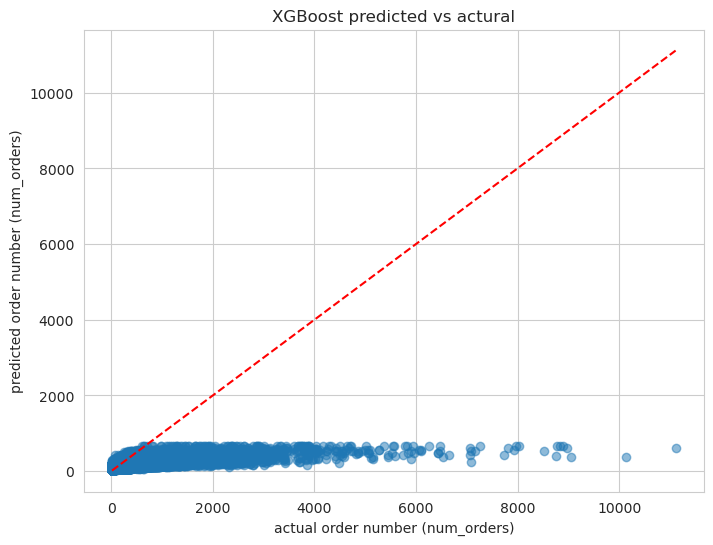

In [281]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


# **绘制 predicted vs actural 散点图**
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.xlabel("actual order number (num_orders)")
plt.ylabel("predicted order number (num_orders)")
plt.title("XGBoost predicted vs actural")
plt.show()

In [283]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import boxcox
from hyperopt import fmin, tpe, hp, Trials

# 读取数据
df_vif = pd.read_csv("/Users/zhaixinyue/Desktop/archive/df_selected_vif.csv")

# 复制数据
df = df_vif.copy()

# **目标变量 Box-Cox 变换**
df["num_orders"], lambda_ = boxcox(df["num_orders"] + 1)

# **划分训练集和测试集**
X = df.drop(columns=["num_orders"])
y = df["num_orders"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Hyperopt 超参数调优**
def objective(params):
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        eval_metric="rmse",
        learning_rate=params["learning_rate"],
        max_depth=int(params["max_depth"]),
        n_estimators=int(params["n_estimators"]),
        subsample=params["subsample"],
        colsample_bytree=params["colsample_bytree"],
        gamma=params["gamma"],
        reg_lambda=params["reg_lambda"],
        min_child_weight=params["min_child_weight"],
        random_state=42
    )
    
    model.fit(
        X_train, y_train, 
        eval_set=[(X_test, y_test)], 
        early_stopping_rounds=10,  # ✅ 只在 `eval_set` 存在时有效
        verbose=False
    )
    
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# **超参数搜索空间**
space = {
    "learning_rate": hp.uniform("learning_rate", 0.005, 0.3),
    "max_depth": hp.choice("max_depth", np.arange(3, 12, dtype=int)),
    "n_estimators": hp.choice("n_estimators", np.arange(100, 800, 50, dtype=int)),
    "subsample": hp.uniform("subsample", 0.6, 1.0),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.6, 1.0),
    "gamma": hp.uniform("gamma", 0, 5),
    "reg_lambda": hp.uniform("reg_lambda", 0, 5),
    "min_child_weight": hp.uniform("min_child_weight", 1, 10),
}

# **执行 Hyperopt**
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
print("最佳超参数:", best_params)

# **转换最优参数**
best_params["max_depth"] = int(best_params["max_depth"])
best_params["n_estimators"] = int(best_params["n_estimators"])

# **训练最终 XGBoost**
final_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    **best_params,
    random_state=42
)

final_model.fit(
    X_train, y_train, 
    eval_set=[(X_test, y_test)], 
    early_stopping_rounds=10,  # ✅ 这里确保生效
    verbose=10
)

# **预测**
y_pred_boxcox = final_model.predict(X_test)

# **逆变换回原始尺度**
y_pred = np.power((y_pred_boxcox * lambda_) + 1, 1 / lambda_) - 1
y_true = np.power((y_test * lambda_) + 1, 1 / lambda_) - 1

# **计算误差指标**
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_mask = (y_true != 0)
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)

# **打印评估结果**
print(f"📌 MAE:  {mae:.2f}")
print(f"📌 RMSE: {rmse:.2f}")
print(f"📌 MAPE: {mape:.2f}%")

# **绘制 预测 vs 真实 散点图**
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.xlabel("真实订单量 (num_orders)")
plt.ylabel("预测订单量 (num_orders)")
plt.title("XGBoost 预测值 vs 真实值")
plt.show()

# **绘制特征重要性**
xgb.plot_importance(final_model, max_num_features=10, height=0.6)
plt.title("Top 10 特征重要性")
plt.show()


  0%|                                   | 0/100 [00:00<?, ?trial/s, best loss=?]

job exception: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'



  0%|                                   | 0/100 [00:00<?, ?trial/s, best loss=?]


TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [247]:
# 1. 加载数据 & 预处理

In [263]:
# **检查 num_orders 的偏度**
print("num_orders 偏度(Skewness):", df["num_orders"].skew())

num_orders 偏度(Skewness): 6.930042235801846


In [248]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from hyperopt import fmin, tpe, hp, Trials

# 读取数据
df = df_vif.copy()  # 复制数据，避免修改原 DataFrame

# **检查 num_orders 的偏度**
print("num_orders 偏度(Skewness):", df["num_orders"].skew())

# 设定特征与目标变量
X = df.drop(columns=["num_orders"])  # 特征
y = df["num_orders"]  # 目标变量（未对数处理）

# **划分训练集和测试集（80% 训练，20% 测试）**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **标准化数据（不影响 XGBoost 决策树结构，但可能有助于提升效果）**
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


num_orders 偏度(Skewness): 6.930042235801846


In [233]:
# 对 num_orders 取 log(1+x) 变换，由于 num_orders 极端右偏，建议进行 log(1+x) 变换，使其更接近正态分布。

In [249]:
import numpy as np

df_vif["num_orders"] = np.log1p(df_vif["num_orders"])  # 取 log(1+x) 防止 0 值问题

In [250]:
# **检查 num_orders 的偏度**
print("num_orders 偏度(Skewness):", df["num_orders"].skew())

num_orders 偏度(Skewness): 6.930042235801846


In [251]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from hyperopt import fmin, tpe, hp, Trials

# 读取数据
df = df_vif.copy()  # 复制数据，避免修改原 DataFrame

# **检查 num_orders 的偏度**
print("num_orders 偏度(Skewness):", df["num_orders"].skew())

# 设定特征与目标变量
X = df.drop(columns=["num_orders"])  # 特征
y = df["num_orders"]  # 目标变量（未对数处理）

# **划分训练集和测试集（80% 训练，20% 测试）**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **标准化数据（不影响 XGBoost 决策树结构，但可能有助于提升效果）**
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


num_orders 偏度(Skewness): -0.0219050806200443


In [252]:
# 创建 XGBoost 训练数据
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# **设定初始 XGBoost 参数**
params = {
    "objective": "reg:squarederror",  # 均方误差
    "eval_metric": "rmse",
    "learning_rate": 0.1,  # 初始学习率
    "max_depth": 6,  # 树的深度
    "n_estimators": 200,  # 迭代次数
    "subsample": 0.8,  # 采样比例
    "colsample_bytree": 0.8,  # 每棵树的特征采样比例
    "random_state": 42,  # 设定随机种子
    "booster": "gbtree",  # 使用树模型
    "gamma": 0,  # 最小损失下降
    "reg_lambda": 1,  # L2 正则化
    "min_child_weight": 1  # 叶子结点最小样本数
}

# 训练 XGBoost
model = xgb.XGBRegressor(**params)
model.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)], verbose=10)

[0]	validation_0-rmse:1.13846
[10]	validation_0-rmse:0.82573
[20]	validation_0-rmse:0.72949
[30]	validation_0-rmse:0.69185
[40]	validation_0-rmse:0.67379
[50]	validation_0-rmse:0.66339
[60]	validation_0-rmse:0.65497
[70]	validation_0-rmse:0.64767
[80]	validation_0-rmse:0.64095
[90]	validation_0-rmse:0.63738
[100]	validation_0-rmse:0.63252
[110]	validation_0-rmse:0.62923
[120]	validation_0-rmse:0.62558
[130]	validation_0-rmse:0.62227
[140]	validation_0-rmse:0.61863
[150]	validation_0-rmse:0.61605
[160]	validation_0-rmse:0.61331
[170]	validation_0-rmse:0.61121
[180]	validation_0-rmse:0.60925
[190]	validation_0-rmse:0.60766
[199]	validation_0-rmse:0.60634


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [176]:
# 预测测试集
y_pred = model.predict(X_test_scaled)

In [177]:
#预测后再转回去

y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # 逆变换回原始 scale
y_true = np.expm1(y_test)  # 真实值也逆变换


In [178]:
# 计算 MAPE（避免除以 0）
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_mask = (y_true != 0)  # 避免除以零错误
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

# 计算误差指标
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

# 打印评估结果
print(f"📌 MAE:  {mae:.2f}")
print(f"📌 RMSE: {rmse:.2f}")
print(f"📌 MAPE: {mape:.2f}%")


📌 MAE:  214.51
📌 RMSE: 352.21
📌 MAPE: 3769.07%


In [69]:
# ✅ 1. 设定超参数搜索空间

In [205]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import randint, uniform

# ✅ **对 num_orders 进行 log(1+x) 变换，防止过拟合 & 处理偏态**
df_vif["num_orders"] = np.log1p(df_vif["num_orders"])

# **划分训练集和测试集**
train_size = int(len(df_vif) * 0.8)
train_df = df_vif.iloc[:train_size]
test_df = df_vif.iloc[train_size:]

# **定义特征和目标变量**
features = df_vif.columns.drop("num_orders")  # 所有列作为特征
X_train, y_train = train_df[features], train_df["num_orders"]
X_test, y_test = test_df[features], test_df["num_orders"]

# 2️⃣ **超参数搜索空间**
param_dist = {
    "n_estimators": randint(100, 1000),  # 树的数量
    "max_depth": randint(3, 15),  # 树的最大深度
    "learning_rate": uniform(0.01, 0.3),  # 学习率
    "subsample": uniform(0.5, 0.5),  # 采样比例
    "colsample_bytree": uniform(0.5, 0.5),  # 特征采样比例
    "gamma": uniform(0, 5),  # 最小损失减少
    "lambda": uniform(0, 10),  # L2 正则化
    "alpha": uniform(0, 10)  # L1 正则化
}

# **初始化 XGBoost 回归模型**
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# **使用随机搜索优化超参数**
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # 迭代 20 次
    scoring="neg_mean_squared_error",
    cv=3,  # 3 折交叉验证
    verbose=2,
    random_state=42,
    n_jobs=-1  # 并行处理
)

# **训练超参数搜索模型**
random_search.fit(X_train, y_train)

# **获取最佳参数**
best_params = random_search.best_params_
print("✅ 最优参数:", best_params)

# 3️⃣ **使用最佳参数训练最终 XGBoost 模型**
final_xgb_model = xgb.XGBRegressor(
    **best_params,
    objective="reg:squarederror",
    random_state=42
)

final_xgb_model.fit(X_train, y_train)

# 4️⃣ **预测测试集**
y_pred_log = final_xgb_model.predict(X_test)

# ✅ **逆变换回原始数据**
y_pred_final = np.expm1(y_pred_log)
y_true_final = np.expm1(y_test)

# 5️⃣ **计算评估指标**
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_mask = (y_true != 0)  # 避免除以零错误
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

mae = mean_absolute_error(y_true_final, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_true_final, y_pred_final))
mape = mean_absolute_percentage_error(y_true_final, y_pred_final)

print(f"🚀 最终 XGBoost 模型评估:")
print(f"📌 MAE:  {mae:.2f}")
print(f"📌 RMSE: {rmse:.2f}")
print(f"📌 MAPE: {mape:.2f}%")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ 最优参数: {'alpha': 2.3598491974895577, 'colsample_bytree': 0.6280341613806619, 'gamma': 0.20216794769215674, 'lambda': 7.106628896857874, 'learning_rate': 0.0432672462435494, 'max_depth': 14, 'n_estimators': 560, 'subsample': 0.6008596011676981}
🚀 最终 XGBoost 模型评估:
📌 MAE:  0.02
📌 RMSE: 0.03
📌 MAPE: 3.10%


In [288]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设 test_df 有日期索引，且是时间格式（如果不是，请调整）
# 如果 test_df 中没有日期列，请将其添加并将其转为 datetime 格式
if not isinstance(test_df.index, pd.DatetimeIndex):
    test_df.index = pd.to_datetime(test_df["date_column"])  # 替换 "date_column" 为实际的日期列

# 创建 DataFrame 用于绘图
df_plot = pd.DataFrame({
    "Date": test_df.index,  # 使用日期作为 X 轴
    "Actual Orders": y_true_final,  # 实际值
    "Predicted Orders": y_pred_final  # 预测值
})

# 绘制图形
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # 设置背景风格

plt.plot(df_plot["Date"], df_plot["Actual Orders"], color="blue", label="Actual Orders", linewidth=2)
plt.plot(df_plot["Date"], df_plot["Predicted Orders"], color="orange", label="Predicted Orders", linewidth=2)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Orders", fontsize=12)
plt.title("Forecast Vs Actual Values", fontsize=14)
plt.legend()
plt.xticks(rotation=45)  # 旋转 x 轴的日期标签，避免重叠
plt.show()


KeyError: 'date_column'

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

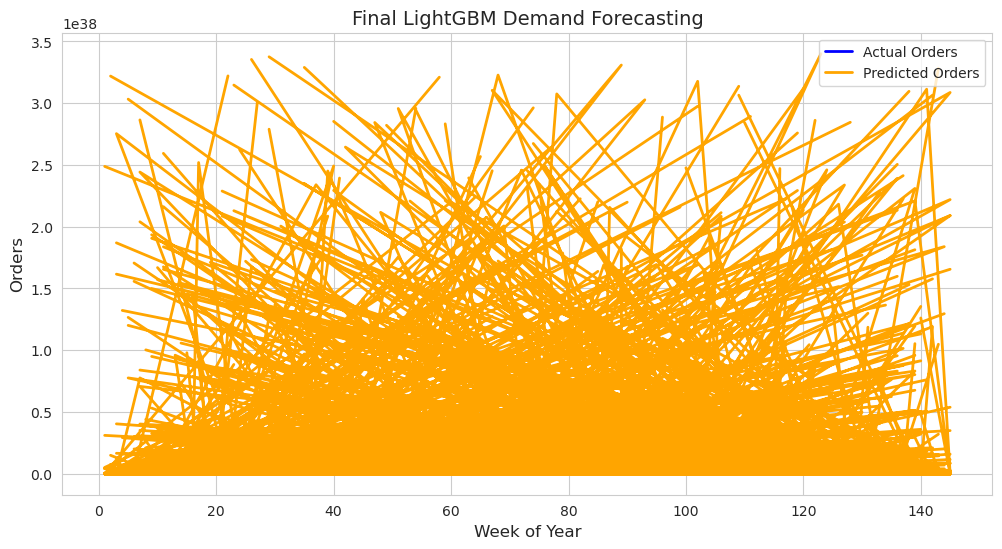

In [287]:
import matplotlib.pyplot as plt
import pandas as pd

# 假设你已经有 y_true_final 和 y_pred_final
# 将预测和真实值创建为 DataFrame
df_plot = pd.DataFrame({
    "Week of Year": X_test["week"],  # 假设 test_df 的索引为日期格式
    "Actual Orders": y_true_final,
    "Predicted Orders": y_pred_final
})

# 绘制图形
plt.figure(figsize=(12, 6))
plt.plot(df_plot["Week of Year"], df_plot["Actual Orders"], color="blue", label="Actual Orders", linewidth=2)
plt.plot(df_plot["Week of Year"], df_plot["Predicted Orders"], color="orange", label="Predicted Orders", linewidth=2)

# 设置标签和标题
plt.xlabel("Week of Year", fontsize=12)
plt.ylabel("Orders", fontsize=12)
plt.title("Final LightGBM Demand Forecasting", fontsize=14)
plt.legend()
plt


In [258]:
y_true_final = np.expm1(y_test)  # 确保正确逆变换

y_pred_final= np.expm1(y_pred) 

/var/folders/gr/_p8chfx50zqdqlly1ny_19d00000gn/T/ipykernel_7590/2301806312.py:3: RuntimeWarning: overflow encountered in expm1
  y_pred_final= np.expm1(y_pred)


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

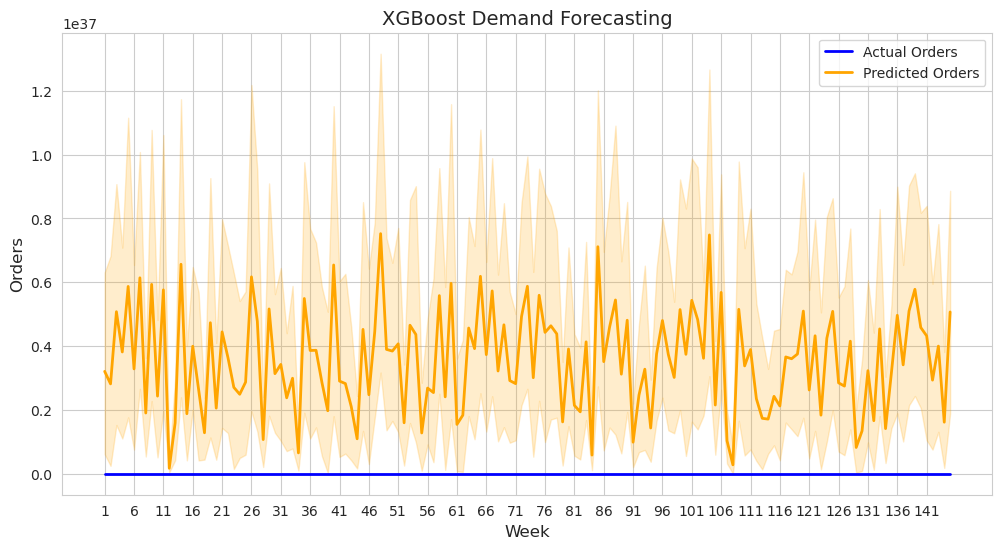

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 生成绘图数据集，确保按 week 排序
plot_data = pd.DataFrame({
    "week": X_test["week"],  # 横坐标使用周数
    "Actual Orders": y_true_final,
    "Predicted Orders": y_pred_final
}).sort_values(by="week")

# 设置画布大小
plt.figure(figsize=(12,6))

# 绘制预测值和真实值
sns.lineplot(x=plot_data["week"], y=plot_data["Actual Orders"], label="Actual Orders", color="blue", linewidth=2)
sns.lineplot(x=plot_data["week"], y=plot_data["Predicted Orders"], label="Predicted Orders", color="orange", linewidth=2)

# 设置标题和标签
plt.title("XGBoost Demand Forecasting", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Orders", fontsize=12)
plt.xticks(ticks=range(1, max(plot_data["week"])+1, 5))  # 每隔 5 周显示一个刻度
plt.legend()

# 显示图形
plt.show()



In [ ]:
import pandas as pd

# 确保 week 变量是整数
X_test["week"] = X_test["week"].astype(int)

# 假设数据对应某一年（例如 2023 年）
year = 2022  # 你可以根据实际数据调整年份

# 将 week 转换为 datetime（以该年第一周的第一天为起点）
X_test["week_date"] = pd.to_datetime(f"{year}-01-01") + pd.to_timedelta((X_test["week"] - 1) * 7, unit="D")

# 按时间排序
X_test = X_test.sort_values(by="week_date")

# 检查转换结果
print(X_test[["week", "week_date"]].head(10))


In [179]:

import numpy as np

df_vif["num_orders"] = np.log1p(df_vif["num_orders"])  # 取 log(1+x) 防止 0 值问题

In [180]:
# 解析最佳参数
best_xgb_params = {
    "max_depth": best_params["max_depth"],
    "n_estimators": best_params["n_estimators"],
    "learning_rate": best_params["learning_rate"],
    "booster": ["gbtree", "dart"][best_params["booster"]],
    "colsample_bytree": best_params["colsample_bytree"],
    "colsample_bynode": best_params["colsample_bynode"],
    "gamma": best_params["gamma"],
    "reg_lambda": best_params["reg_lambda"],
    "min_child_weight": best_params["min_child_weight"],
    "subsample": best_params["subsample"],
    "objective": "reg:squarederror",
    "random_state": 42
}

# 训练最终 XGBoost 模型
final_xgb_model = xgb.XGBRegressor(**best_xgb_params)
final_xgb_model.fit(X_train_scaled, y_train)

# 进行预测
y_pred_final_log = final_xgb_model.predict(X_test_scaled)

# 逆变换回原始数据
y_pred_final = np.expm1(y_pred_final_log)
y_true_final = np.expm1(y_test)

# 计算误差指标
mae_final = mean_absolute_error(y_true_final, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_true_final, y_pred_final))
mape_final = mean_absolute_percentage_error(y_true_final, y_pred_final)

print(f"🚀 最终 XGBoost 模型评估:")
print(f"📌 MAE:  {mae_final:.2f}")
print(f"📌 RMSE: {rmse_final:.2f}")
print(f"📌 MAPE: {mape_final:.2f}%")


🚀 最终 XGBoost 模型评估:
📌 MAE:  147.74
📌 RMSE: 336.92
📌 MAPE: 83.02%


In [183]:

import numpy as np

df_vif["num_orders"] = np.log1p(df_vif["num_orders"])  # 取 log(1+x) 防止 0 值问题

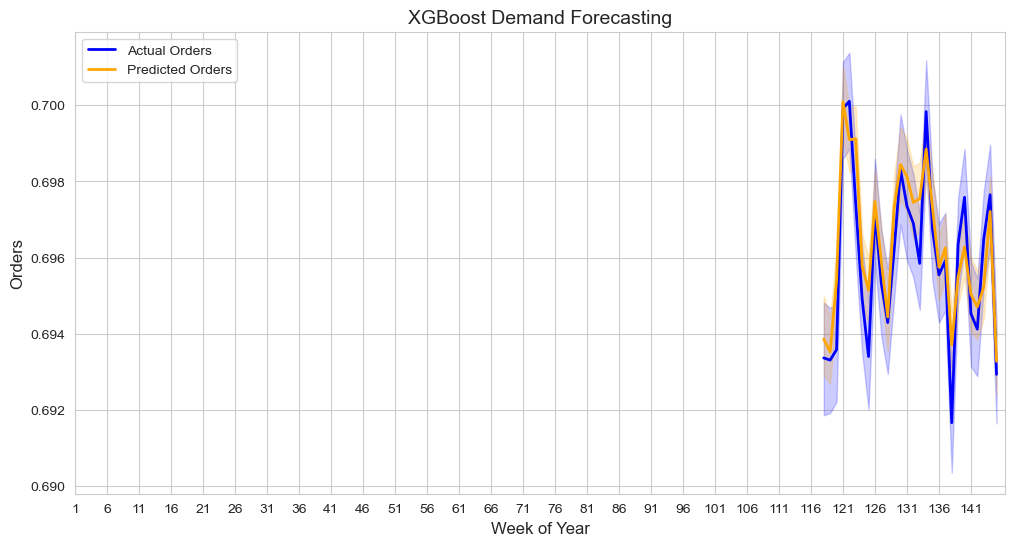

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 生成绘图数据集，确保按 week 排序
plot_data = pd.DataFrame({
    "week": X_test["week"],  # 横坐标使用周数
    "Actual Orders": y_true_final,
    "Predicted Orders": y_pred_final
}).sort_values(by="week")

# 设置画布大小
plt.figure(figsize=(12,6))

# 绘制预测值和真实值
sns.lineplot(x=plot_data["week"], y=plot_data["Actual Orders"], label="Actual Orders", color="blue", linewidth=2)
sns.lineplot(x=plot_data["week"], y=plot_data["Predicted Orders"], label="Predicted Orders", color="orange", linewidth=2)

# 设置标题和标签
plt.title("XGBoost Demand Forecasting", fontsize=14)
plt.xlabel("Week of Year", fontsize=12)
plt.ylabel("Orders", fontsize=12)
plt.xticks(ticks=range(1, max(plot_data["week"])+1, 5))  # 每隔 5 周显示一个刻度
plt.legend()

# 显示图形
plt.show()


In [243]:
import pandas as pd

# 确保 week 变量是整数
X_test["week"] = X_test["week"].astype(int)

# 假设数据对应某一年（例如 2023 年）
year = 2022  # 你可以根据实际数据调整年份

# 将 week 转换为 datetime（以该年第一周的第一天为起点）
X_test["week_date"] = pd.to_datetime(f"{year}-01-01") + pd.to_timedelta((X_test["week"] - 1) * 7, unit="D")

# 按时间排序
X_test = X_test.sort_values(by="week_date")

# 检查转换结果
print(X_test[["week", "week_date"]].head(10))


      week  week_date
696      1 2022-01-01
369      1 2022-01-01
2791     1 2022-01-01
2873     1 2022-01-01
1536     1 2022-01-01
779      1 2022-01-01
782      1 2022-01-01
289      1 2022-01-01
1673     1 2022-01-01
123      1 2022-01-01


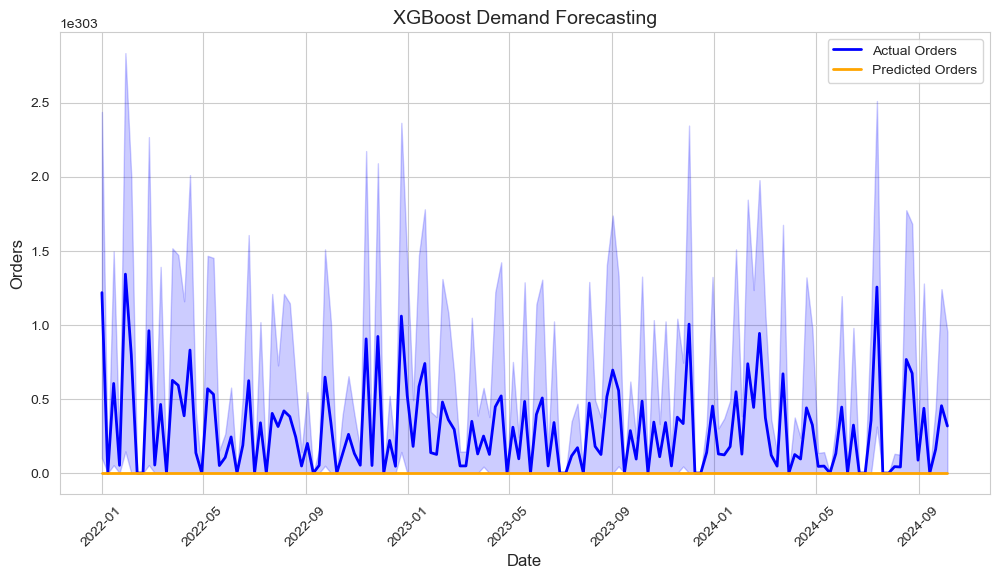

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# 创建绘图数据
plot_data = pd.DataFrame({
    "week_date": X_test["week_date"],
    "Actual Orders": y_true_final,
    "Predicted Orders": y_pred_final
})

# 绘制趋势图
plt.figure(figsize=(12,6))
sns.lineplot(x=plot_data["week_date"], y=plot_data["Actual Orders"], label="Actual Orders", color="blue", linewidth=2)
sns.lineplot(x=plot_data["week_date"], y=plot_data["Predicted Orders"], label="Predicted Orders", color="orange", linewidth=2)

# 美化图表
plt.xticks(rotation=45)  # 旋转 x 轴标签
plt.xlabel("Date", fontsize=12)
plt.ylabel("Orders", fontsize=12)
plt.title("XGBoost Demand Forecasting", fontsize=14)
plt.legend()
plt.show()


In [ ]:
# 修改调参模型